In [96]:
from processing_functions import *
%matplotlib inline

In [97]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')

In [98]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78209 entries, 0 to 78208
Columns: 242 entries, ovar_reasfoll to in_TGWAS_population
dtypes: float64(191), int64(48), object(3)
memory usage: 144.4+ MB


In [99]:
personal_data.head()

,ovar_reasfoll,ovar_reassurv,ovar_reassymp,ovar_reasoth,ovar_cancer,ovar_intstat_cat,ovar_annyr,ovar_cancer_site,ovar_stage,ovar_stage_7e,...,sex,age,agelevel,dual,reconsent_outcome,reconsent_outcome_days,fstcan_exitstat,fstcan_exitage,fstcan_exitdays,in_TGWAS_population
0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,74,3,0,5,5621,8,87,4672,1
1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,63,1,0,1,4106,8,72,3386,1
2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,59,0,0,1,5864,8,72,4969,1
3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,57,0,0,1,4687,8,68,4106,1
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,62,1,0,2,6126,8,78,5573,1


In [100]:
personal_data_nan_cols = [i for i in personal_data.columns if personal_data[i].isnull().any()]
personal_data_drop_features = [col for col in personal_data_nan_cols if col.startswith('ovar_')]
print(f'Number of features that are result of the cancer diagnosis: {len(personal_data_drop_features)}')
# Drop features that are result of the cancer diagnosis
# personal_data = personal_data.drop(personal_data_drop_features, axis=1)

Number of features that are result of the cancer diagnosis: 36


In [101]:
def print_records_vs_unique(df, col, dataset_name):
    # Get unique IDs
    print(f"Num of records in {dataset_name} dataset: {len(df)}")
    print(f"Num of unique {col} in {dataset_name} dataset: {len(df[col].unique())}")

print_records_vs_unique(personal_data, 'plco_id', 'personal')
# Check the number of people with cancer
personal_data_cancer = personal_data[personal_data['ovar_cancer']==1]
print(f"Num of patients with cancer: {len(personal_data_cancer)}")
# Check the number of people without cancer
personal_data_no_cancer = personal_data[personal_data['ovar_cancer']==0]
print(f"Num of patients without cancer: {len(personal_data_no_cancer)}")

Num of records in personal dataset: 78209
Num of unique plco_id in personal dataset: 78209
Num of patients with cancer: 613
Num of patients without cancer: 77596


In [102]:
# get percentage values missing
def get_missing_values_cols(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    missing_value_df = missing_value_df[missing_value_df.percent_missing != 0]
    return missing_value_df
personal_data_missing_value = get_missing_values_cols(personal_data)
missing_90_or_more = personal_data_missing_value[personal_data_missing_value.percent_missing >= 90]
missing_50_or_more = personal_data_missing_value[personal_data_missing_value.percent_missing >= 50]

In [103]:
personal_data_missing_value.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_missing,192.0,42.622026,38.383291,2.677441,3.349359,50.001918,69.834674,99.937347


In [104]:
missing_50_or_more

,column_name,percent_missing
tvu_result3,tvu_result3,50.001918
tvu_result0,tvu_result0,50.001918
tvu_result1,tvu_result1,50.001918
ca125_result4,ca125_result4,50.001918
ca125_result1,ca125_result1,50.001918
...,...,...
ovar_clinstage_t,ovar_clinstage_t,99.845286
ovar_clinstage_n,ovar_clinstage_n,99.850401
ovar_clinstage_7e,ovar_clinstage_7e,99.874695
ovar_clinstage,ovar_clinstage,99.881088


In [105]:
def print_records_vs_unique_for(df, col, dataset_name, on):
    print_records_vs_unique(df, col, dataset_name)
    # Look at unique IDs for each of the years of study for screen dataset
    for val in sorted(df[on].unique()):
        # Get unique IDs
        print_records_vs_unique(df[df[on] == val], col, f'{dataset_name}.{on}={val}')

print_records_vs_unique_for(screen_data, 'plco_id', 'screen', 'study_yr')

Num of records in screen dataset: 150993
Num of unique plco_id in screen dataset: 30849
Num of records in screen.study_yr=0 dataset: 28919
Num of unique plco_id in screen.study_yr=0 dataset: 28919
Num of records in screen.study_yr=1 dataset: 27607
Num of unique plco_id in screen.study_yr=1 dataset: 27607
Num of records in screen.study_yr=2 dataset: 26637
Num of unique plco_id in screen.study_yr=2 dataset: 26637
Num of records in screen.study_yr=3 dataset: 25459
Num of unique plco_id in screen.study_yr=3 dataset: 25459
Num of records in screen.study_yr=4 dataset: 20146
Num of unique plco_id in screen.study_yr=4 dataset: 20146
Num of records in screen.study_yr=5 dataset: 22225
Num of unique plco_id in screen.study_yr=5 dataset: 22225


In [125]:
personal_data_cancer[['plco_id', 'ovar_cancer_diagdays', 'fstcan_exitdays', 'ovar_exitdays']].describe().T

,count,mean,std,min,25%,50%,75%,max
ovar_cancer_diagdays,613.0,2751.973899,1751.601513,5.0,1213.0,2745.0,4137.0,6895.0
fstcan_exitdays,613.0,2512.432300,1596.348029,5.0,1068.0,2564.0,3826.0,5800.0
ovar_exitdays,613.0,2647.187602,1606.080617,5.0,1213.0,2745.0,3929.0,5804.0


In [121]:
len(personal_data_cancer[personal_data_cancer['ovar_cancer_diagdays']<5*365])

221

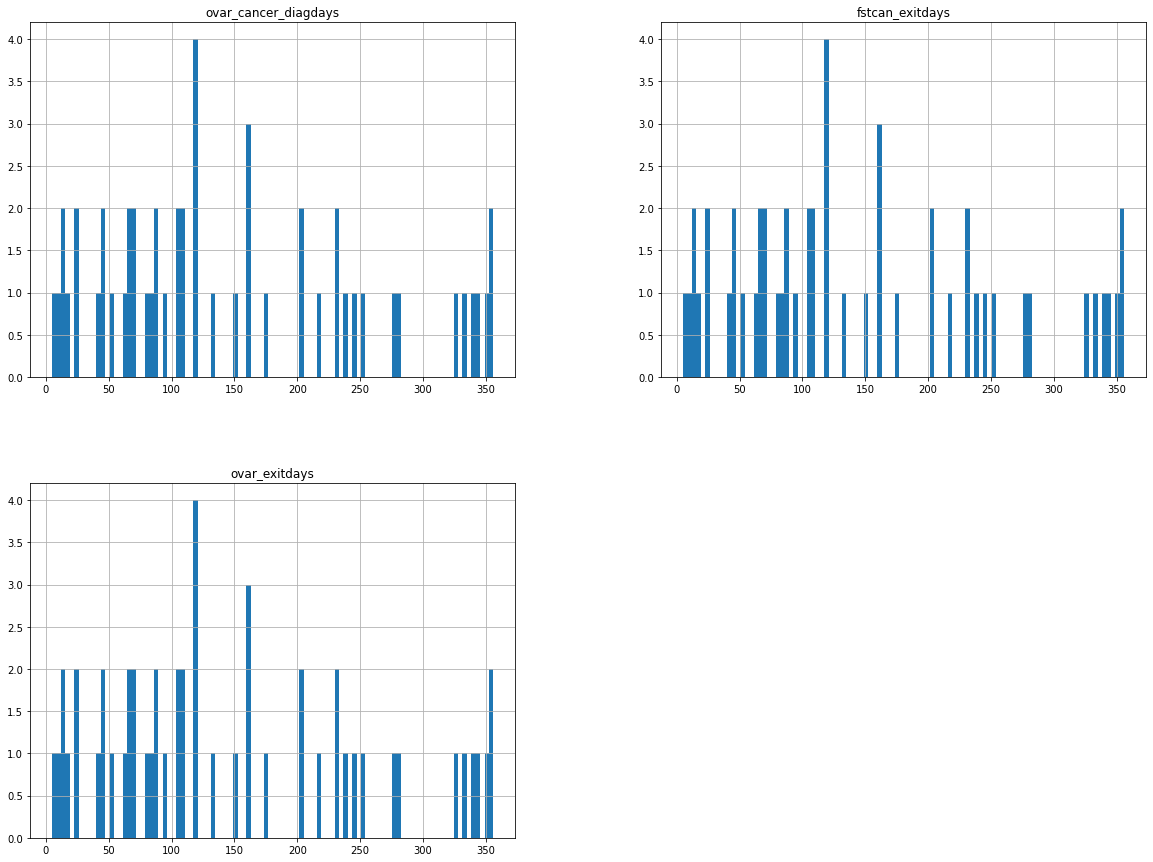

In [126]:
personal_data_cancer[personal_data_cancer['ovar_cancer_diagdays']<365][['plco_id', 'ovar_cancer_diagdays', 'fstcan_exitdays', 'ovar_exitdays']].hist(figsize=(20,15), bins=100);

In [210]:
# Turn screen dataset each year into a feature
merged_data_screen = None
for val in sorted(screen_data['study_yr'].unique()):
    df = screen_data[screen_data['study_yr'] == val]
    cols = df.columns
    cols_dict = {}
    for col in cols:
        if col not in ['plco_id']:
            cols_dict[col] = f'{col}_{val}'
    df = df.rename(columns=cols_dict)
    # Get unique IDs
    if merged_data_screen is None:
        merged_data_screen = df
    else:
        merged_data_screen = merged_data_screen.merge(df, on='plco_id', how='outer')

In [211]:
# Remove all inad_ and examinerid_ features
inad_cols = [col for col in merged_data_screen.columns if col.startswith('inad_') or col.startswith('examinerid_')]
print(f'Number of inad_ cols: {len(inad_cols)}')
merged_data_screen = merged_data_screen.drop(inad_cols, axis=1)
# Remove features that are 100% missing
merged_data_screen_missing_value = get_missing_values_cols(merged_data_screen)
merged_data_screen_missing_value_100 = merged_data_screen_missing_value[merged_data_screen_missing_value.percent_missing == 100]
print(merged_data_screen_missing_value_100.describe().T)
print(merged_data_screen_missing_value_100['column_name'].to_list())
# drop completely missing columns
merged_data_screen = merged_data_screen.drop(merged_data_screen_missing_value_100['column_name'].to_list(), axis=1)
# Drop all object features
object_cols = [col for col in merged_data_screen.select_dtypes(include=object).columns if col != 'plco_id']
merged_data_screen = merged_data_screen.drop(object_cols, axis=1)

Number of inad_ cols: 294
                 count   mean  std    min    25%    50%    75%    max
percent_missing  118.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0
['ovcyst_outlinel_4', 'ovcyst_diam_5', 'ovcyst_diaml_5', 'ovcyst_diamr_5', 'ovcyst_outline_5', 'ovcyst_solid_5', 'ovcyst_outlinel_5', 'ovcyst_solidl_5', 'ovcyst_outliner_5', 'ovcyst_solidr_5', 'detr_q_4', 'tvures_qvis1_4', 'tvures_qvis2_4', 'phycons_5', 'ovcyst_volr_5', 'medcomp_5', 'tvu_ref_5', 'rtran_q_5', 'rtran_p_5', 'rlong_q_5', 'rlong_p_5', 'rantero_q_5', 'rantero_p_5', 'ltran_q_5', 'ltran_p_5', 'llong_q_5', 'physid_5', 'ovcyst_voll_5', 'detl_q_4', 'llong_p_5', 'tvudays_pvis1_5', 'tvu_days_5', 'tvu_assess_days_q_5', 'tvures_qvis3_0', 'ca125i_assess_days_5', 'tvures_qvis3_1', 'tvures_qvis3_2', 'ca125i_assess_days_2', 'tvudays_pvis2_5', 'tvures_pvis3_3', 'tvures_qvis3_3', 'ca125i_assess_days_3', 'tvudays_pvis3_3', 'detl_p_4', 'ovary_vol_5', 'ovary_voll_5', 'ovary_volr_5', 'ovary_diaml_5', 'ovary_diamr_5', 'ovary_diam_5

In [214]:
merged_data_screen_missing_value = get_missing_values_cols(merged_data_screen)
merged_data_screen_missing_value_100 = merged_data_screen_missing_value[merged_data_screen_missing_value.percent_missing >= 90]

In [215]:
merged_data_screen_missing_value_100.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_missing,90.0,96.10018,2.508877,90.268728,94.366916,96.022562,97.889721,99.996758


In [212]:
# Merge cancer patients dataset with screen dataset and see missing values
merged_data_cancer = personal_data_cancer.merge(merged_data_screen, on='plco_id', how='left')

In [218]:
print_records_vs_unique_for(screen_abnorm_data, 'plco_id', 'screen_abnorm_data', 'study_yr')

Num of records in screen_abnorm_data dataset: 20186
Num of unique plco_id in screen_abnorm_data dataset: 6992
Num of records in screen_abnorm_data.study_yr=0 dataset: 5418
Num of unique plco_id in screen_abnorm_data.study_yr=0 dataset: 3546
Num of records in screen_abnorm_data.study_yr=1 dataset: 5029
Num of unique plco_id in screen_abnorm_data.study_yr=1 dataset: 3305
Num of records in screen_abnorm_data.study_yr=2 dataset: 4902
Num of unique plco_id in screen_abnorm_data.study_yr=2 dataset: 3117
Num of records in screen_abnorm_data.study_yr=3 dataset: 4837
Num of unique plco_id in screen_abnorm_data.study_yr=3 dataset: 2959


In [213]:
merged_data_cancer

,ovar_reasfoll,ovar_reassurv,ovar_reassymp,ovar_reasoth,ovar_cancer,ovar_intstat_cat,ovar_annyr,ovar_cancer_site,ovar_stage,ovar_stage_7e,...,visboth_5,viseith_5,numcystl_5,numcystr_5,numcyst_5,build_cancers_5,build_incidence_cutoff_5,ca125_days_5,ca125ii_assess_days_5,ovar_days_5
0,1.0,NaN,0.0,0.0,1,5.0,0.0,1.0,330.0,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1,3.0,13.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,1.0,0.0,1,3.0,8.0,1.0,330.0,330.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1879.0,1885.0,1879.0
3,0.0,NaN,1.0,0.0,1,1.0,7.0,1.0,230.0,230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,0.0,1.0,1,1.0,11.0,1.0,220.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1.0,NaN,0.0,0.0,1,5.0,0.0,1.0,110.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,0.0,NaN,1.0,0.0,1,3.0,8.0,2.0,330.0,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,1.0,NaN,1.0,0.0,1,5.0,1.0,1.0,330.0,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,1.0,NaN,0.0,0.0,1,5.0,0.0,1.0,310.0,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Determine on which features to use mean imputation and on which ones to replace with -1

In [113]:
# Calculate years before cancer

In [115]:
# For the screening dataset merge all 'inad_' into 1? 

 The initial dataset had 181 variables (Appendix 1). Variables were ranked by their F-score, which is the harmonic mean of precision and recall, with those with an F-score closest to 1.0 demonstrating high correlation with treatment success [10]. Experts in the treatment of BPH also selected variables for inclusion into the models irrespective of the F-Score, these variables, plus those with a high F-Score were selected for inclusion in initial model development.. The actual variables used by our models were a subset of these, and the number in any given fold and subgroup was dynamically determined by treating this as a hyper-parameter and tuning it as described below.